## Do new balls give an advantage to the server.

In [1]:
import pandas as pd
import numpy as np


#!git clone https://github.com/JeffSackmann/tennis_pointbypoint


In [2]:
df = pd.read_csv('tennis_pointbypoint/pbp_matches_atp_main_archive.csv')
c_df = pd.read_csv('tennis_pointbypoint/pbp_matches_ch_main_archive.csv')
df = df.append(c_df)

#### Split every match into games using ";" which is the game separator. Then calculate service points won in every game. Points won by the server are S and A, points won by the receiver are R and D

In [4]:
game_count_list = []


In [7]:
len(df)

30169

In [32]:
results = []
from tqdm import tqdm_notebook


for match in tqdm_notebook(df[0:].itertuples()):
    points = match.pbp
    no_of_games = len(points.split(';'))
    game_index = [i for i in range(no_of_games)]
    for gi in game_index:
        won = []
        try:
            spw = points.split(';')[gi].count('S') + points.split(';')[gi].count('A') 
            rpw = points.split(';')[gi].count('R') + points.split(';')[gi].count('D')
        except Exception as e:
            pass
            #print(e, match.split(';')[gi])
        won.append(spw / (spw + rpw))
        results.append((gi, np.array(won).mean()))

In [45]:
# number of games
len(results)

661478

### Shift the game numbers so we aren't 0-indexed.

In [50]:
game_serve = pd.DataFrame(results)
game_serve.columns = ['game', 'spw']
game_serve['game_no'] = game_serve['game'].shift(-1)

### New balls are initially after 7 games, then after every 9 games. 

Game 1 has new balls (not exactly because of the warmup), then after 7 games which mean game 8 starts with new balls. Then after than game 17, 26, 35.


In [51]:
game_serve['new_balls'] = 0
game_serve.loc[game_serve.game_no.isin([1,8,17,26,35]), 'new_balls'] = 1.

In [52]:
game_serve = game_serve.loc[game_serve.game_no < 25, :]

(0.62, 0.68)

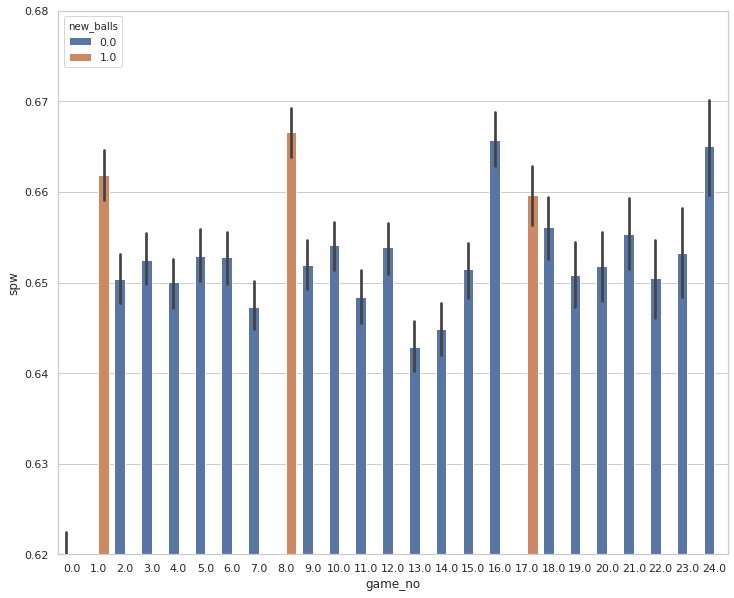

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


f, ax = plt.subplots(figsize = (12,10))
s = sns.barplot(x='game_no', y='spw', data=game_serve, hue='new_balls')
axes = s.axes
axes.set_ylim(0.62,0.68)


In [54]:
game_serve.groupby('new_balls')['spw'].mean()

new_balls
0.0    0.649984
1.0    0.663072
Name: spw, dtype: float64

In [58]:
game_serve

,game,spw,game_no,new_balls
0,0,1.000000,1.0,1.0
1,1,0.000000,2.0,0.0
2,2,0.666667,3.0,0.0
3,3,0.666667,4.0,0.0
4,4,0.375000,5.0,0.0
...,...,...,...,...
661472,12,0.800000,13.0,0.0
661473,13,1.000000,14.0,0.0
661474,14,1.000000,15.0,0.0
661475,15,0.800000,16.0,0.0


In [42]:
def calculate_ball_age(game_no):
    if game_no > 8:
        age = (game_no % 9) + 1
        if age == 9:
            age = 0
        return age
    elif (game_no < 8):
        age = game_no - 1
        return age
    elif game_no == 8:
        return 0

       
        
calculate_ball_age(7)

6

In [60]:
game_serve['ball_age'] = list(map(calculate_ball_age, game_serve.game_no))

In [61]:
game_serve


,game,spw,game_no,new_balls,ball_age
0,0,1.000000,1.0,1.0,0.0
1,1,0.000000,2.0,0.0,1.0
2,2,0.666667,3.0,0.0,2.0
3,3,0.666667,4.0,0.0,3.0
4,4,0.375000,5.0,0.0,4.0
...,...,...,...,...,...
661472,12,0.800000,13.0,0.0,5.0
661473,13,1.000000,14.0,0.0,6.0
661474,14,1.000000,15.0,0.0,7.0
661475,15,0.800000,16.0,0.0,8.0


In [62]:
game_serve.groupby('ball_age')['spw'].mean()

ball_age
-1.0    0.619683
 0.0    0.663072
 1.0    0.652358
 2.0    0.652772
 3.0    0.649745
 4.0    0.653758
 5.0    0.648357
 6.0    0.647250
 7.0    0.655069
 8.0    0.665696
Name: spw, dtype: float64

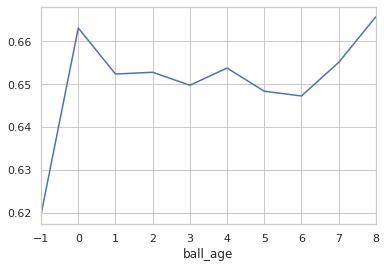

In [63]:
game_serve.groupby('ball_age')['spw'].mean().plot(kind='line')